In [1]:
import numpy as np
# import tensorflow as tf
from collections import Counter
from string import punctuation

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


['/job:localhost/replica:0/task:0/device:GPU:0']

## 1. Data Preprocessing

In [2]:
with open('reviews.txt', 'r') as f:
    reviews = f.read()
with open('labels.txt', 'r') as f:
    labels = f.read()

In [3]:
len(reviews)

33678267

In [4]:
reviews[:2000]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   \nstory of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is tu

In [5]:
type(labels)

str

In [6]:
labels[:100]

'positive\nnegative\npositive\nnegative\npositive\nnegative\npositive\nnegative\npositive\nnegative\npositive\nn'

In [7]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
all_text = ''.join([c for c in reviews if c not in punctuation])
reviews = all_text.split('\n') # list : ['doc', 'doc', ...]

all_text = ' '.join(reviews)
words = all_text.split()

In [9]:
print(reviews[:3])
print('\n')
print(words[:100])

['bromwell high is a cartoon comedy  it ran at the same time as some other programs about school life  such as  teachers   my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers   the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students  when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled          at           high  a classic line inspector i  m here to sack one of your teachers  student welcome to bromwell high  i expect that many adults of my age think that bromwell high is far fetched  what a pity that it isn  t   ', 'story of a man who has unnatural feelings for a pig  starts out with a opening scene that is a terrific example of absurd comedy  a formal orchestra audience is turned into an insane  viole

## 2. Encoding words and labels

In [10]:
# Create your dictionary that maps vocab words to integers here
word_count = Counter(words)
vocab = sorted(word_count, key=word_count.get, reverse=True)
vocab_to_int = {word: i for i, word in enumerate(vocab, 1)}
# print(vocab_to_int)

In [11]:
# Convert the reviews to integers, same shape as reviews list, but with integers
reviews_ints = []
for review in reviews:
    reviews_ints.append([vocab_to_int[word] for word in review.split()]) 
print(len(reviews_ints))
print(len(reviews_ints[0]), len(reviews_ints[1]))
print(reviews_ints[:2])

25001
140 114
[[21025, 308, 6, 3, 1050, 207, 8, 2138, 32, 1, 171, 57, 15, 49, 81, 5785, 44, 382, 110, 140, 15, 5194, 60, 154, 9, 1, 4975, 5852, 475, 71, 5, 260, 12, 21025, 308, 13, 1978, 6, 74, 2395, 5, 613, 73, 6, 5194, 1, 24103, 5, 1983, 10166, 1, 5786, 1499, 36, 51, 66, 204, 145, 67, 1199, 5194, 19869, 1, 37442, 4, 1, 221, 883, 31, 2988, 71, 4, 1, 5787, 10, 686, 2, 67, 1499, 54, 10, 216, 1, 383, 9, 62, 3, 1406, 3686, 783, 5, 3483, 180, 1, 382, 10, 1212, 13583, 32, 308, 3, 349, 341, 2913, 10, 143, 127, 5, 7690, 30, 4, 129, 5194, 1406, 2326, 5, 21025, 308, 10, 528, 12, 109, 1448, 4, 60, 543, 102, 12, 21025, 308, 6, 227, 4146, 48, 3, 2211, 12, 8, 215, 23], [63, 4, 3, 125, 36, 47, 7472, 1395, 16, 3, 4181, 505, 45, 17, 3, 622, 134, 12, 6, 3, 1279, 457, 4, 1721, 207, 3, 10624, 7373, 300, 6, 667, 83, 35, 2116, 1086, 2989, 34, 1, 898, 46417, 4, 8, 13, 5096, 464, 8, 2656, 1721, 1, 221, 57, 17, 58, 794, 1297, 832, 228, 8, 43, 98, 123, 1469, 59, 147, 38, 1, 963, 142, 29, 667, 123, 1, 13584, 41

In [12]:
labels = labels.split('\n')
labels = [1 if label=='positive' else 0 for label in labels]

In [13]:
assert len(labels) == 25001

In [14]:
# check abnormal docs
review_lens = Counter([len(x) for x in reviews_ints])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))

Zero-length reviews: 1
Maximum review length: 2514


In [15]:
# delete the blank doc
not_zero_idx = [i for i, sublist in enumerate(reviews_ints) if len(sublist) != 0]
print(len(not_zero_idx))

25000


In [16]:
# Filter out that review with 0 length
reviews_ints = [reviews_ints[idx] for idx in not_zero_idx]
labels = np.array([labels[idx] for idx in not_zero_idx])
print(len(reviews_ints), len(labels))

25000 25000


In [17]:
# transform doc list to array (length=200) 
seq_len = 200
features = np.zeros((len(reviews_ints), seq_len), dtype=int)
for i, review_int in enumerate(reviews_ints):
    features[i, -len(review_int):] = np.array(review_int)[:seq_len]

In [18]:
features[:2,:]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 21025,   308,     6,
            3,  1050,   207,     8,  2138,    32,     1,   171,    57,
           15,    49,    81,  5785,    44,   382,   110,   140,    15,
         5194,    60,   154,     9,     1,  4975,  5852,   475,    71,
            5,   260,    12, 21025,   308,    13,  1978,     6,    74,
         2395,     5,   613,    73,     6,  5194,     1, 24103,     5,
         1983, 10166,     1,  5786,  1499,    36,    51,    66,   204,
          145,    67,  1199,  5194, 19869,     1, 37442,     4,     1,
      

In [19]:
features.shape

(25000, 200)

## 3. Training, Validation, Testing set

In [20]:
split_frac = 0.8
train_val = int(len(features)*split_frac)
train_x, val_x = features[:train_val], features[train_val:]
train_y, val_y = labels[:train_val], labels[train_val:]

val_test = int(len(val_x)*0.5)
val_x, test_x = val_x[:val_test], val_x[val_test:]
val_y, test_y = val_y[:val_test], val_y[val_test:]

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(20000, 200) 
Validation set: 	(2500, 200) 
Test set: 		(2500, 200)


## 4. Model

In [21]:
embed_size = 100
lstm_units = 256
# lstm_layers = 1
batch_size = 500
learning_rate = 0.001

In [22]:
vocab_size = len(vocab_to_int) + 1
vocab_size

74073

In [23]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=seq_len))
model.add(LSTM(lstm_units)) # dropout, recurrent_dropout
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          7407300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 7,773,125
Trainable params: 7,773,125
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=10, validation_data=(val_x, val_y))

Train on 20000 samples, validate on 2500 samples
Epoch 1/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.7057 - acc: 0.6029 - val_loss: 0.6875 - val_acc: 0.5956
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6793 - acc: 0.6781 - val_loss: 0.6812 - val_acc: 0.6236
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6176 - acc: 0.7363 - val_loss: 0.5458 - val_acc: 0.7276
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.3864 - acc: 0.8421 - val_loss: 0.4532 - val_acc: 0.8092
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2239 - acc: 0.9177 - val_loss: 0.4588 - val_acc: 0.8256
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1299 - acc: 0.9572 - val_loss: 0.5323 - val_acc: 0.8228
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0853 - acc: 0.9749 - val_loss: 0.6329 - val_acc:

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


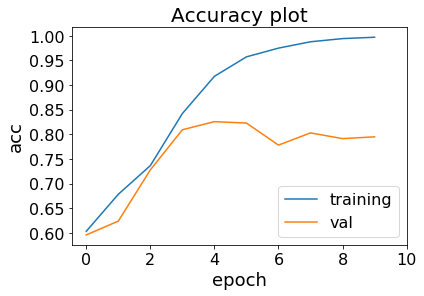

In [25]:
# training accuracy, val accuracy
import matplotlib.pyplot as plt

%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.legend(['training', 'val'], loc='lower right', fontsize=16)

plt.title('Accuracy plot', fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('acc', fontsize=18)

plt.xticks(range(0, 11, 2), fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [26]:
# evaluate the model
score, acc = model.evaluate(test_x, test_y, batch_size=500)
print('Test score:', score)
print('Test accuracy:', acc)

2500/2500 [==============================] - 1s 349us/step
Test score: 0.8986197352409363
Test accuracy: 0.78160001039505


In [27]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=seq_len))
model.add(LSTM(lstm_units, dropout=0.2)) # recurrent_dropout
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(train_x, train_y, batch_size=batch_size, epochs=10, validation_data=(val_x, val_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 100)          7407300   
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 7,773,125
Trainable params: 7,773,125
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 2500 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6857 - acc: 0.6010 - val_loss: 0.6553 - val_acc: 0.6480
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6437 - acc: 0.6526 - val_loss: 0.6166 - val_acc: 0.6488
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/st

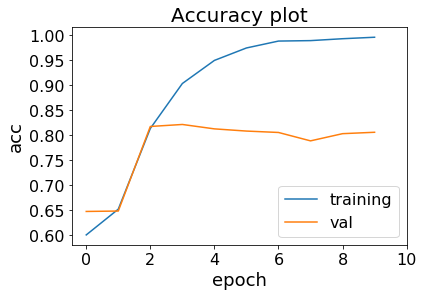

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.legend(['training', 'val'], loc='lower right', fontsize=16)

plt.title('Accuracy plot', fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('acc', fontsize=18)

plt.xticks(range(0, 11, 2), fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [29]:
# evaluate the model
score, acc = model.evaluate(test_x, test_y, batch_size=500)
print('Test score:', score)
print('Test accuracy:', acc)

2500/2500 [==============================] - 1s 371us/step
Test score: 0.8827150225639343
Test accuracy: 0.8108000040054322


In [30]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=seq_len))
model.add(LSTM(lstm_units, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(train_x, train_y, batch_size=batch_size, epochs=10, validation_data=(val_x, val_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 100)          7407300   
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 7,773,125
Trainable params: 7,773,125
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 2500 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6674 - acc: 0.6035 - val_loss: 0.6093 - val_acc: 0.7252
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.4828 - acc: 0.7923 - val_loss: 0.4272 - val_acc: 0.8028
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/st

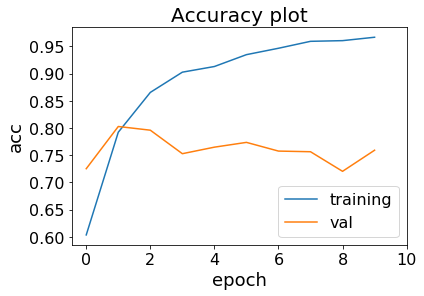

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.legend(['training', 'val'], loc='lower right', fontsize=16)

plt.title('Accuracy plot', fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('acc', fontsize=18)

plt.xticks(range(0, 11, 2), fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [32]:
# evaluate the model
score, acc = model.evaluate(test_x, test_y, batch_size=500)
print('Test score:', score)
print('Test accuracy:', acc)

2500/2500 [==============================] - 1s 382us/step
Test score: 0.9143427014350891
Test accuracy: 0.7580000042915345


## 5. Model with pre-trained word vectors

In [33]:
# 从GloVe文件中解析出每个词和它所对应的词向量，并用字典的方式存储
# 使用的词向量：100维
embeddings_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as txtfile:
    lines = txtfile.readlines()
    for line in lines:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(len(embeddings_index))

400000


In [34]:
print(embeddings_index['the'])

[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.27062 ]

In [37]:
# vocab_to_int

In [35]:
# 构建词向量矩阵, 没有的单词的词向量均为0
embedding_dim = 100
embedding_matrix = np.zeros((len(vocab_to_int) + 1, embedding_dim))
for word, idx in vocab_to_int.items():
    embed_vector = embeddings_index.get(word)
    if embed_vector is not None:
        embedding_matrix[idx] = embed_vector

In [36]:
# 词向量加载到embedding层中，trainable=False 使得这个编码层不可再训练
embedding_layer = Embedding(vocab_size,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=seq_len,
                            trainable=True)

In [37]:
# 模型结构：词嵌入-LSTM-全连接
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
# 在全连接层上对权重实施L2正则化，对输出实施L1正则化
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(20, activation='softmax', kernel_regularizer=regularizers.l2(0.01), 
#                 activity_regularizer=regularizers.l1(0.01)))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

# earlystop = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=0, verbose=0, mode='auto')]
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=10, validation_data=(val_x, val_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 100)          7407300   
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 7,773,125
Trainable params: 7,773,125
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 2500 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6562 - acc: 0.6026 - val_loss: 0.5725 - val_acc: 0.7056
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5647 - acc: 0.7137 - val_loss: 0.5016 - val_acc: 0.7732
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/st

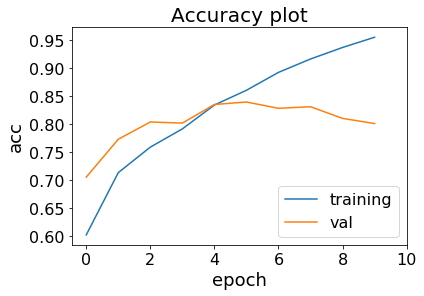

In [38]:
# training accuracy, val accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.legend(['training', 'val'], loc='lower right', fontsize=16)

plt.title('Accuracy plot', fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('acc', fontsize=18)

plt.xticks(range(0, 11, 2), fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [39]:
# evaluate the model
score, acc = model.evaluate(test_x, test_y, batch_size=500)
print('Test score:', score)
print('Test accuracy:', acc)

2500/2500 [==============================] - 1s 379us/step
Test score: 0.6035305321216583
Test accuracy: 0.8088000059127808
